# Deep Learning with PyTorch : Build an AutoEncoder

An autoencoder is a type of neural network that learns to copy its input to its output. In autoencoder, encoder encodes the image into compressed representation, and the decoder decodes the representation.

![](denoising_autoencoder.png)

Applications of AutoEncoder:

- Segmentation
- Denoising Image
- Super Resolution Image
- Image Compression
- and many more .....

In this Project, you will see the simplest implemention of autoencoder for image denoising task.

In [1]:
import torch 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

# Exploring Dataset 

In [2]:
data = pd.read_csv('mnist_dataset.csv')
data

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
image = data.iloc[3] # selecting image at index 3
image = np.array(image).astype('float32').reshape(28,28) #reshaping
image = image / 255 # scaling step

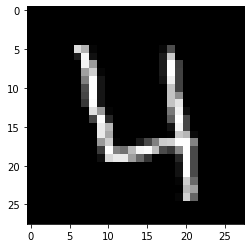

In [4]:
plt.imshow(image, cmap='gray')

In [5]:
noisy_image = image + 0.2*np.random.rand(*image.shape)
noisy_image = np.clip(noisy_image, 0,1)

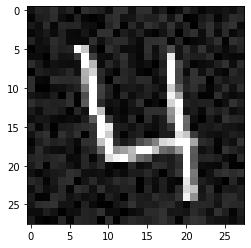

In [6]:
plt.imshow(noisy_image, cmap='gray')

# Data Preparation 

In [7]:
from torch.utils.data import Dataset
from helper import show_image, ToTensorForAE

<img src="dataset.png" alt="drawing" width="400"/>

In [21]:
class MNIST_AE_Dataset(Dataset):
    def __init__(self, csv_file, transform=None, noise_factor = 0.2):
        self.data = pd.read_csv(csv_file)
        self.noise_factor = noise_factor
        self.transform = transform
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        img = self.data.iloc[idx]
        img = np.array(img).reshape((28,28,1)) / 255
        noisy_img = img + self.noise_factor * np.random.randn(*img.shape)
        noisy_img = np.clip(noisy_img, 0, 1)
        sample = (noisy_img, img)
        
        if self.transform:
            sample = self.transform(sample)
            
        return sample

### **Here to ToTensorForAE() is a custom transform which will convert numpy,PIL image to torch tensor and also it will convert image with (height,width,channel) to (channel,height,width) as per the pytorch model input convention.**

For eg, numpy array image with shape (28,28,1) will be first converted to image torch tensor with shape(28,28,1)
and then the channel is shifted to 0th axis so image tensor will be with shape (1,28,28)

In [22]:
trainset = MNIST_AE_Dataset('mnist_dataset.csv', transform = ToTensorForAE())

In [23]:
print("Size of trainset:", len(trainset))

Size of trainset: 42000


In [26]:
noisy_img, org_img = trainset[69]

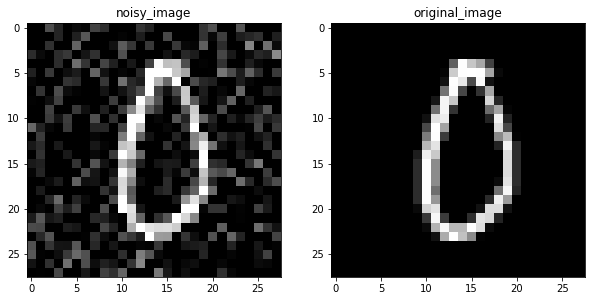

In [27]:
show_image(noisy_img, org_img)

# Load dataset into batches

In [28]:
from torch.utils.data import DataLoader

In [29]:
trainloader = DataLoader(trainset, batch_size=16, shuffle=True)

In [35]:
dataiter = iter(trainloader)
noisy_img,org_img = dataiter.next()

print(f"Shapeof loading one batch: {noisy_img.shape}:")

print(f"Total number of batches: {len(trainloader)}")

print(f"Total number of examples: {len(trainloader.dataset)}")

Shapeof loading one batch: torch.Size([16, 1, 28, 28]):
Total number of batches: 2625
Total number of examples: 42000


# Create AutoEncoder Model

In [36]:
from torch import nn
from torchsummary import summary

In [37]:
def Encoder():
    enc = nn.Sequential(
        nn.Conv2d(in_channels=1, out_channels=16, kernel_size=(3,3), padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=(2,2)),
        nn.Conv2d(in_channels=16, out_channels=32, kernel_size=(3,3), padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=(2,2)),
    )
    return enc

def Decoder():
    dec = nn.Sequential(
        nn.ConvTranspose2d(in_channels=32, out_channels=16, kernel_size=(2,2), stride=2),
        nn.ReLU(),
        nn.ConvTranspose2d(in_channels=16, out_channels=1, kernel_size=(2,2), stride=2),
        nn.Sigmoid()
    )
    return dec



In [ ]:
class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        
        self.encoder = Encoder()
        self.decoder = Decoder()
        
    def forward(self, images):
        

# Train AutoEncoder Model 

# Plot Results